In [42]:
#Import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


#Create dummy dataset

np.random.seed(42)

aircraft_list = ['B777', 'A320', 'A330', 'B787']
issue_types = ['Engine', 'Avionics', 'Landing Gear', 'Hydraulics', 'None']

data = []
for i in range(100):
    date = pd.Timestamp('2025-01-01') + pd.Timedelta(days=random.randint(0, 330))
    aircraft = random.choice(aircraft_list)
    flight_id = f'FL{i+1:03d}'
    issue = random.choice(issue_types)
    cost = 0 if issue == 'None' else random.randint(1000, 20000)
    downtime = 0 if issue == 'None' else random.randint(1, 48)
    revenue = random.randint(10000, 100000)
    fuel = random.randint(500, 5000)
    passengers = random.randint(50, 300)
    data.append([date, aircraft, flight_id, issue, cost, downtime, revenue, fuel, passengers])

df = pd.DataFrame(data, columns=['Date','Aircraft','FlightID','IssueType','Cost','DowntimeHours','Revenue','FuelUsed','Passengers'])

# Convert Month to string for SQL compatibility
df['Month'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')

# Cost efficiency: Maintenance cost / Revenue ratio
df['Cost_to_Revenue'] = df['Cost'] / df['Revenue']

# Revenue loss due to downtime (assuming linear daily revenue)
df['RevenueLoss'] = df['DowntimeHours'] * (df['Revenue'] / 24)

# Fuel efficiency per passenger
df['FuelPerPassenger'] = df['FuelUsed'] / df['Passengers']

# -------------------------------
# Save CSV (for Power BI)
# -------------------------------
df.to_csv('maintenance_operations_data.csv', index=False)
print("CSV created! Sample data:")
df.head()



CSV created! Sample data:


,Date,Aircraft,FlightID,IssueType,Cost,DowntimeHours,Revenue,FuelUsed,Passengers,Month,Cost_to_Revenue,RevenueLoss,FuelPerPassenger
0,2025-07-12,A320,FL001,Landing Gear,8222,41,50960,2408,121,2025-07,0.161342,87056.666667,19.900826
1,2025-05-09,B787,FL002,Engine,3982,8,38084,1328,64,2025-05,0.104558,12694.666667,20.750000
2,2025-06-28,A330,FL003,None,0,0,74351,2376,161,2025-06,0.000000,0.000000,14.757764
3,2025-07-09,A330,FL004,None,0,0,20690,2512,234,2025-07,0.000000,0.000000,10.735043
4,2025-07-05,A330,FL005,Landing Gear,13237,22,21554,1745,293,2025-07,0.614132,19757.833333,5.955631


In [43]:
df = pd.read_csv('maintenance_operations_data.csv')

In [44]:
print(df.isna().sum())

Date                 0
Aircraft             0
FlightID             0
IssueType           20
Cost                 0
DowntimeHours        0
Revenue              0
FuelUsed             0
Passengers           0
Month                0
Cost_to_Revenue      0
RevenueLoss          0
FuelPerPassenger     0
dtype: int64


In [45]:
# Total maintenance cost per aircraft
total_cost_aircraft = df.groupby('Aircraft')['Cost'].sum()
print("\nTotal Maintenance Cost by Aircraft:\n", total_cost_aircraft)


Total Maintenance Cost by Aircraft:
 Aircraft
A320    173489
A330    233566
B777    243379
B787    137618
Name: Cost, dtype: int64


In [46]:
# Average downtime per aircraft
avg_downtime_aircraft = df.groupby('Aircraft')['DowntimeHours'].mean()
print("\nAverage Downtime by Aircraft:\n", avg_downtime_aircraft)


Average Downtime by Aircraft:
 Aircraft
A320    15.909091
A330    18.709677
B777    22.275862
B787    20.333333
Name: DowntimeHours, dtype: float64


In [47]:
# Monthly maintenance cost trend
monthly_cost = df.groupby('Month')['Cost'].sum()
print("\nMonthly Maintenance Cost:\n", monthly_cost)


Monthly Maintenance Cost:
 Month
2025-01    104280
2025-02     58831
2025-03     40305
2025-04     54875
2025-05     54980
2025-06     72520
2025-07    104472
2025-08     42909
2025-09     51245
2025-10    136268
2025-11     67367
Name: Cost, dtype: int64


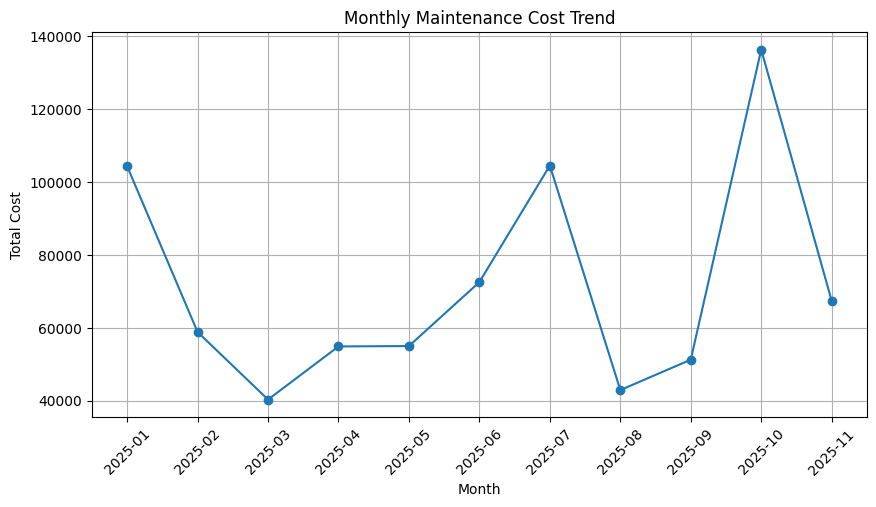

In [48]:
# Plot monthly cost trend
plt.figure(figsize=(10,5))
plt.plot(monthly_cost.index, monthly_cost.values, marker='o')
plt.title('Monthly Maintenance Cost Trend')
plt.xlabel('Month')
plt.ylabel('Total Cost')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [49]:
# Top recurring issues
top_issues = df['IssueType'].value_counts()
print("\nTop Recurring Issues:\n", top_issues)


Top Recurring Issues:
 IssueType
Landing Gear    24
Avionics        22
Hydraulics      21
Engine          13
Name: count, dtype: int64


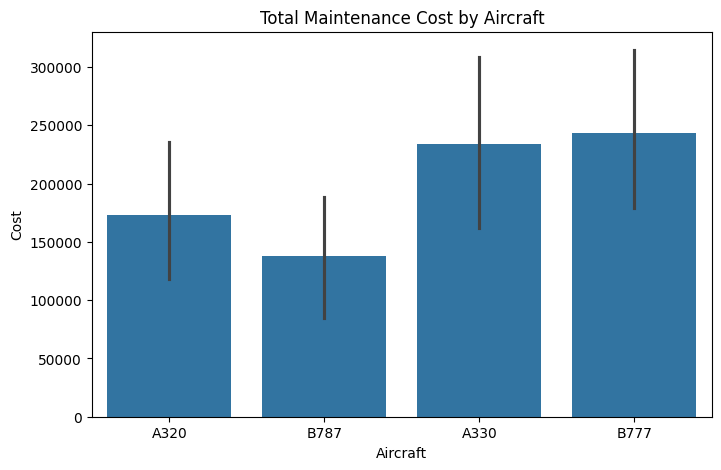

In [50]:
# Bar plot: Maintenance cost by aircraft
plt.figure(figsize=(8,5))
sns.barplot(x='Aircraft', y='Cost', data=df, estimator=sum)
plt.title('Total Maintenance Cost by Aircraft')
plt.show()

In [51]:
# Cost efficiency per aircraft
cost_efficiency = df.groupby('Aircraft')['Cost_to_Revenue'].mean()
print("\nAverage Cost-to-Revenue Ratio per Aircraft:\n", cost_efficiency)


Average Cost-to-Revenue Ratio per Aircraft:
 Aircraft
A320    0.160737
A330    0.194490
B777    0.188519
B787    0.145888
Name: Cost_to_Revenue, dtype: float64


In [52]:
# Revenue loss due to downtime per aircraft
revenue_loss_aircraft = df.groupby('Aircraft')['RevenueLoss'].sum()
print("\nTotal Revenue Loss due to Downtime per Aircraft:\n", revenue_loss_aircraft)


Total Revenue Loss due to Downtime per Aircraft:
 Aircraft
A320    8.872305e+05
A330    1.275718e+06
B777    1.869049e+06
B787    9.188253e+05
Name: RevenueLoss, dtype: float64


In [53]:
# Fuel efficiency per aircraft
fuel_efficiency = df.groupby('Aircraft')['FuelPerPassenger'].mean()
print("\nAverage Fuel Used per Passenger per Aircraft:\n", fuel_efficiency)


Average Fuel Used per Passenger per Aircraft:
 Aircraft
A320    20.511009
A330    19.345417
B777    19.770383
B787    12.708042
Name: FuelPerPassenger, dtype: float64


In [54]:
# Issue frequency and total cost
issue_analysis = df.groupby('IssueType').agg({'Cost':'sum','FlightID':'count'})
issue_analysis.rename(columns={'FlightID':'IssueCount'}, inplace=True)
print("\nIssue Analysis (Frequency & Total Cost):\n", issue_analysis)


Issue Analysis (Frequency & Total Cost):
                 Cost  IssueCount
IssueType                       
Avionics      214376          22
Engine        147197          13
Hydraulics    220648          21
Landing Gear  205831          24


In [55]:
# Monthly summary of multiple KPIs
monthly_summary = df.groupby('Month').agg({'Cost':'sum','Revenue':'sum','DowntimeHours':'sum'})
print("\nMonthly Summary (Cost, Revenue, Downtime):\n", monthly_summary)


Monthly Summary (Cost, Revenue, Downtime):
            Cost  Revenue  DowntimeHours
Month                                  
2025-01  104280   733913            236
2025-02   58831   563747            176
2025-03   40305   504322            152
2025-04   54875   625031            150
2025-05   54980   273376            102
2025-06   72520   652299            212
2025-07  104472   716091            295
2025-08   42909   390120            142
2025-09   51245   146201            109
2025-10  136268   768077            288
2025-11   67367   473600             80


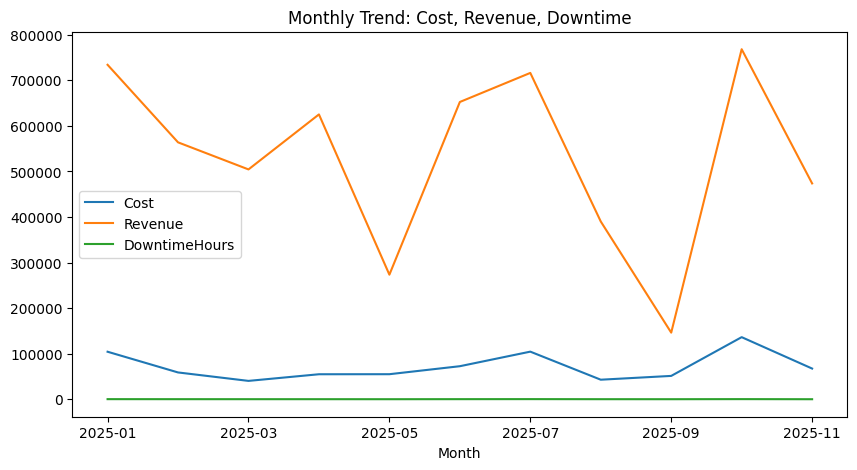

In [56]:
# Plot monthly summary
monthly_summary.plot(kind='line', figsize=(10,5))
plt.title('Monthly Trend: Cost, Revenue, Downtime')
plt.show()

In [57]:
# SQL Queries using SQLite
conn = sqlite3.connect(':memory:')
df.to_sql('maintenance_operations', conn, index=False, if_exists='replace')


100

In [58]:
# Total maintenance cost per aircraft
query1 = "SELECT Aircraft, SUM(Cost) AS TotalCost FROM maintenance_operations GROUP BY Aircraft ORDER BY TotalCost DESC"
result1 = pd.read_sql_query(query1, conn)
print("\nSQL Result - Total Cost per Aircraft:\n", result1)



SQL Result - Total Cost per Aircraft:
   Aircraft  TotalCost
0     B777     243379
1     A330     233566
2     A320     173489
3     B787     137618


In [59]:
#Average downtime per issue type
query2 = "SELECT IssueType, AVG(DowntimeHours) AS AvgDowntime FROM maintenance_operations WHERE IssueType != 'None' GROUP BY IssueType"
result2 = pd.read_sql_query(query2, conn)
print("\nSQL Result - Average Downtime per Issue Type:\n", result2)


SQL Result - Average Downtime per Issue Type:
       IssueType  AvgDowntime
0      Avionics    26.727273
1        Engine    19.923077
2    Hydraulics    20.523810
3  Landing Gear    27.666667


In [60]:
#Monthly maintenance cost trend
query3 = "SELECT Month, SUM(Cost) AS TotalCost FROM maintenance_operations GROUP BY Month ORDER BY Month"
result3 = pd.read_sql_query(query3, conn)
print("\nSQL Result - Monthly Maintenance Cost:\n", result3)


SQL Result - Monthly Maintenance Cost:
       Month  TotalCost
0   2025-01     104280
1   2025-02      58831
2   2025-03      40305
3   2025-04      54875
4   2025-05      54980
5   2025-06      72520
6   2025-07     104472
7   2025-08      42909
8   2025-09      51245
9   2025-10     136268
10  2025-11      67367
